In [2]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("Dataset\pet_supplies_2212.csv")

In [4]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [5]:
df.tail()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1
1499,1500,Food,Cat,Medium,25.95,826.08,4.0,1


In [6]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [7]:
# Shape of the data
df.shape

(1500, 8)

In [8]:
# Check for missing values
df.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

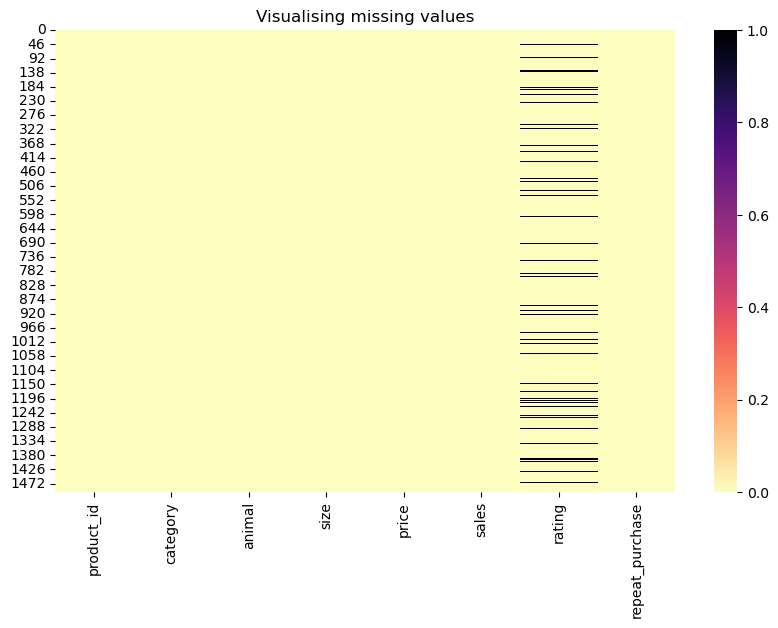

In [9]:
# Visualise missing values
plt.figure(figsize = (10, 6))
sns.heatmap(df.isnull(),cbar = True, cmap = 'magma_r')
plt.title('Visualising missing values')
plt.show()

In [10]:
# check columns
df.columns

Index(['product_id', 'category', 'animal', 'size', 'price', 'sales', 'rating',
       'repeat_purchase'],
      dtype='object')

In [11]:
# check the data types
df.dtypes

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

## Data Manipulation and Validation
- Handle the missing values for rating by using the ffill method to replace the null values in rating, and replace the null values with 0 respectively.
- Treat 'unlisted' in the price column as a missing value, and it will be replaced with the overall median price.
- Treat 'N/A' in the rating column as a missing value, and it will be replaced with 0.
- Replace the missing value in Category with unknown.
- Convert rating to int.
- Convert price and sales to 2-decimal places


In [12]:
# check the columns that categorical and numerical 
numerical_cols = df.select_dtypes(include=['int64', 'float']).columns.tolist()
numerical_cols

['product_id', 'sales', 'rating', 'repeat_purchase']

In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols


['category', 'animal', 'size', 'price']

In [14]:
# value counts for categorical variables 
for column in categorical_cols:
    print(df[column].value_counts())

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64
Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64
small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64
unlisted    150
22.98        13
28           10
28.03         8
19.94         8
           ... 
38.66         1
36            1
19.97         1
39.19         1
25.79         1
Name: price, Length: 707, dtype: int64


In [15]:
# value counts for numerical variables 
for column in numerical_cols:
    print(df[column].value_counts())

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: product_id, Length: 1500, dtype: int64
1034.36    3
742.87     2
1342.90    2
1031.11    2
1348.27    2
          ..
1072.20    1
727.87     1
1460.29    1
1196.56    1
826.08     1
Name: sales, Length: 1476, dtype: int64
5.0    304
6.0    299
4.0    283
3.0    190
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: rating, dtype: int64
1    906
0    594
Name: repeat_purchase, dtype: int64


## Manipulation and Validation of Categorical columns


In [21]:
# Replace "-" with "unknown"
df['category'] = df['category'].replace('-', 'unknown')

# Count the number of occurrences of "unknown" in the column
num_unknown = (df['category'] == 'unknown').sum()
print(f"{num_unknown} occurrences of 'unknown' found")


25 occurrences of 'unknown' found


In [16]:
## Manipulation & validation of categorical columns
df['rating'].fillna(0, inplace=True)

In [17]:
## To check if there is missing values in 'rating'
df['rating'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: rating, Length: 1500, dtype: bool>

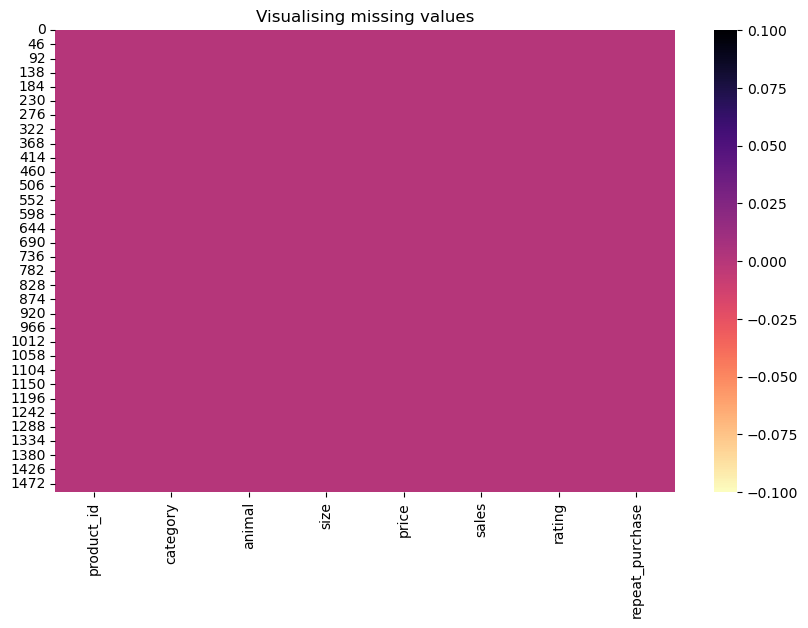

In [19]:
# Visualise missing values
plt.figure(figsize = (10, 6))
sns.heatmap(df.isnull(),cbar = True, cmap = 'magma_r')
plt.title('Visualising missing values')
plt.show()

## Manipulation and Validation of numerical columns


In [22]:
# Replace "unlisted" with NaN
df['price'] = df['price'].replace('unlisted', np.nan)

# Calculate the median price value
median_price = df['price'].median()

# Replace missing values with median price value
df['price'].fillna(median_price, inplace=True)

In [25]:
# Replace 'N/A' with 0
df['rating'] = df['rating'].replace('N/A', 0)

In [29]:
df[df['rating'] == 0].head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
20,21,Food,Fish,medium,28.065,542.06,0.0,0
44,45,Medicine,Bird,medium,28.065,1209.41,0.0,0
46,47,Toys,Cat,SMALL,28.065,1367.47,0.0,1
70,71,Equipment,Dog,LARGE,28.065,1446.43,0.0,0
73,74,Food,Bird,Large,28.065,1864.01,0.0,0


In [31]:
# Round sales and prices to 2 decimal places
df['sales'] = df['sales'].apply(lambda x: round(x, 2) if isinstance(x, float) and x.as_integer_ratio()[1] != 1 else x)
df['price'] = df['price'].apply(lambda x: round(x, 2) if isinstance(x, float) and x.as_integer_ratio()[1] != 1 else x)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


## Exploratory Data Analysis


In [34]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


## Univariates Analysis

In [37]:
# Calculate summary satistics for all numerical column
df.describe().astype('int')

,product_id,sales,rating,repeat_purchase
count,1500,1500,1500,1500
mean,750,996,4,0
std,433,323,2,0
min,1,286,0,0
25%,375,747,3,0
50%,750,1000,5,1
75%,1125,1158,6,1
max,1500,2255,9,1


In [35]:
# Count the number of unique product_id
df['product_id'].nunique()

1500

In [36]:
# Count of products in each category
category_counts = df['category'].value_counts()

print(category_counts)

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
unknown       25
Name: category, dtype: int64


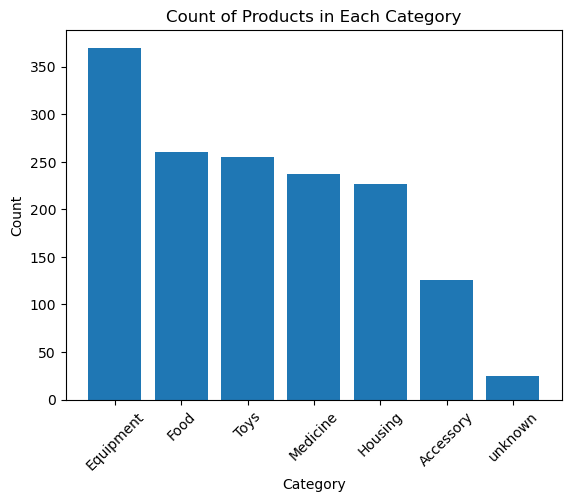

In [38]:
category_counts = df['category'].value_counts()

# Create a bar chart
plt.bar(category_counts.index, category_counts.values)

# Set chart title and axis labels
plt.title('Count of Products in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

In [39]:
# count of products for each animal category
animal_counts = df['animal'].value_counts()

print(animal_counts)

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64


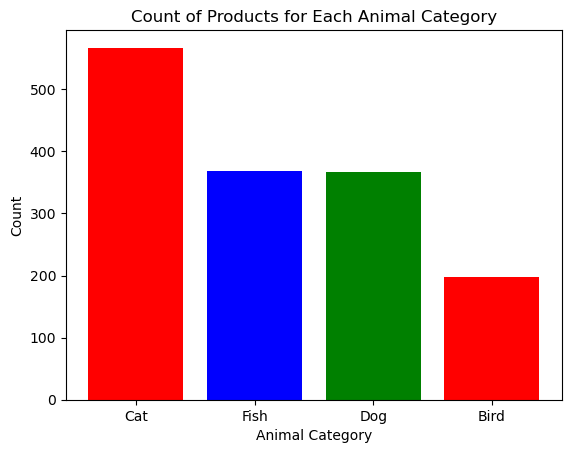

In [40]:
# Create a bar chart
plt.bar(animal_counts.index, animal_counts.values, color=['red', 'blue', 'green'])

# Set chart title and axis labels
plt.title('Count of Products for Each Animal Category')
plt.xlabel('Animal Category')
plt.ylabel('Count')

# Display the chart
plt.show()

In [43]:
# Calculate summary statistics for 'sales' column
df['sales'].describe()

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

In [44]:
# Calculate summary statistics for 'rating' column
df['rating'].describe()

count    1500.000000
mean        4.492000
std         2.105443
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: rating, dtype: float64

In [45]:
# count of repeat purchases
df['repeat_purchase'].value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64